### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [1]:
import pandas as pd
import numpy as np

# Models
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Settings

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
auto_data = pd.read_csv("audi.csv")
auto_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
# Судя по информации из кэгла и результату функции info, пропусков в данных нет

In [4]:
for col in auto_data.columns:
    print()
    print(col,': ', auto_data[col].unique())


model :  [' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']

year :  [2017 2016 2019 2015 2014 2018 2013 2020 2004 2009 2012 2010 2007 2011
 2008 2003 2005 2002 2006 1998 1997]

price :  [12500 16500 11000 ... 21291 12380  3750]

transmission :  ['Manual' 'Automatic' 'Semi-Auto']

mileage :  [15735 36203 29946 ...  4018  1978  8646]

fuelType :  ['Petrol' 'Diesel' 'Hybrid']

tax :  [150  20  30 145 125 200   0 205 160 235 260 325 300 165 240 565 265 135
 570 555 140 330 305 155 580 290 195 115 295 220 230 280 315 535 190 540
 515]

mpg :  [ 55.4  64.2  67.3  49.6  58.9  61.4  70.6  60.1  57.6  52.3  53.3  56.5
  47.1  47.9  62.8  76.3  51.4  65.7  68.9  50.4  72.4  38.7  74.3  42.8
  83.1  57.7  54.3  40.4  44.1  33.2  42.2  44.8  48.7  37.7  35.8  40.9
  45.6  34.   29.4  39.8  39.2  41.5  38.2  32.1  30.7  34.9  43.5  36.2
  30.1  32.8  29.7  26.4  33.6  34.5  46.3  37

In [5]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
# Можем построить графики, чтобы посмотреть на зависимость призанков друг от друга. Для линейной регрессии необходимо, 
# чтобы признаки были независимы друг от друга.

In [ ]:
sns.pairplot(auto_data)

In [ ]:
plt.figure(figsize=(18,20))
for i, column in enumerate(auto_data.columns):
    plt.subplot(4, 4, i + 1)
    plt.scatter(auto_data[column], auto_data['price'])
    plt.xlabel(column)
    plt.ylabel('price')

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(), annot = True, linewidths=0.7, ax=ax )

<AxesSubplot:>

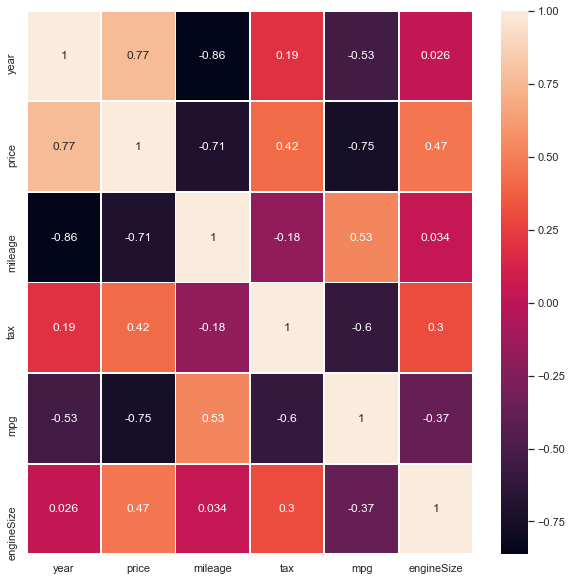

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax )

In [46]:
# Если на графики смотреть устали, то можем воспользоваться Variance Influence Factor -
# https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

In [6]:
def get_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return(vif)

In [48]:
# Кроме того у нас есть в таблице категориальные признаки - 'model','transmission','fuelType'
# Для работы с которыми надо бы представить их в виде dummies

In [7]:
auto_data_dummy = pd.get_dummies(data = auto_data, columns = ['model','transmission','fuelType'])
auto_data_dummy.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [50]:
# Посмотрим мультиколлинеарность с помощью VIF
# Исключим заранее столбец price

In [8]:
get_vif(auto_data_dummy.loc[:, auto_data_dummy.columns != 'price'])

/Users/vladsuhomlinov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,year,3.048
1,mileage,3.020
2,tax,2.175
3,mpg,5.108
4,engineSize,3.912
5,model_ A1,inf
6,model_ A2,inf
7,model_ A3,inf
8,model_ A4,inf
9,model_ A5,inf


In [54]:
# Видим высокую долю зависимости в столбце VIF
# Модели вида Ridge, Lasso Regression должны справляться с мультиколлинеарностью, а для обычной регрессии
# такое не пройдет, поэтому удалим некоторые столбцы

In [13]:
auto_data_dummy_dropped = auto_data_dummy.drop(['model_ A1'],axis = 1)
get_vif(auto_data_dummy_dropped.loc[:, auto_data_dummy_dropped.columns != 'price'])

/Users/vladsuhomlinov/.pyenv/versions/3.9.1/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,year,3.048
1,mileage,3.020
2,tax,2.175
3,mpg,5.108
4,engineSize,3.912
5,model_ A2,1.007
6,model_ A3,2.195
7,model_ A4,2.301
8,model_ A5,2.014
9,model_ A6,2.094


In [57]:
# Видим, что модели машин сталии более независимыми признаками
# разберемся с топливом и трансмиссией

In [14]:
auto_data_dummy_dropped= auto_data_dummy_dropped.drop(['fuelType_Diesel', 'transmission_Automatic', 'year'],axis = 1)
get_vif(auto_data_dummy_dropped.loc[:, auto_data_dummy_dropped.columns != 'price'])

,variables,VIF
0,mileage,2.788
1,tax,7.548
2,mpg,16.611
3,engineSize,28.470
4,model_ A2,1.002
5,model_ A3,2.514
6,model_ A4,2.531
7,model_ A5,2.117
8,model_ A6,2.145
9,model_ A7,1.349


In [82]:
# Выберем данные и ответы

In [15]:
X, Y = auto_data_dummy.drop('price', axis = 1), auto_data_dummy['price']
X.head()

,year,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,15735,150,55.4,1.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,36203,20,64.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,29946,30,55.4,1.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,25952,145,67.3,2.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,2019,1998,145,49.6,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [87]:
# Суффикс d обозанчает данные с выброшенными столбцами

In [16]:
Xd, Yd = auto_data_dummy_dropped.drop('price', axis = 1), auto_data_dummy_dropped['price']
Xd.head()

,mileage,tax,mpg,engineSize,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,...,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,15735,150,55.4,1.4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,36203,20,64.2,2.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,29946,30,55.4,1.4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,25952,145,67.3,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1998,145,49.6,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [86]:
# Разделим выборки

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, random_state=10)
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split (Xd, Yd, test_size = 0.3, random_state=10)

In [89]:
# Стандартизируем

In [18]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[-0.509,  1.02 , -1.881, ...,  0.968, -0.052, -0.963],
       [ 1.332, -1.026,  0.272, ...,  0.968, -0.052, -0.963],
       [ 0.872, -0.909,  0.272, ...,  0.968, -0.052, -0.963],
       ...,
       [ 0.872, -0.821,  0.272, ...,  0.968, -0.052, -0.963],
       [-0.049,  0.491,  0.347, ..., -1.033, -0.052,  1.039],
       [-0.509, -0.065, -1.584, ...,  0.968, -0.052, -0.963]])

In [19]:
std_scaler = StandardScaler()

Xd_train_scaled = std_scaler.fit_transform(Xd_train)
Xd_test_scaled = std_scaler.transform(Xd_test)

Xd_train_scaled

array([[ 1.02 , -1.881,  1.824, ..., -0.713, -0.052, -0.963],
       [-1.026,  0.272, -1.347, ...,  1.402, -0.052, -0.963],
       [-0.909,  0.272,  0.057, ..., -0.713, -0.052, -0.963],
       ...,
       [-0.821,  0.272,  0.366, ..., -0.713, -0.052, -0.963],
       [ 0.491,  0.347, -0.607, ...,  1.402, -0.052,  1.039],
       [-0.065, -1.584,  1.284, ...,  1.402, -0.052, -0.963]])

In [92]:
# Обучим модели

In [23]:
lineard = LinearRegression()
lineard.fit(Xd_train, Yd_train)

lassod = Lasso()
lassod.fit(Xd_train, Yd_train)

lassocvd = LassoCV()
lassocvd.fit(Xd_train, Yd_train)

ridged = Ridge()
ridged.fit(Xd_train, Yd_train)

ridgecvd = RidgeCV()
ridgecvd.fit(Xd_train, Yd_train)

forestd = RandomForestRegressor(n_estimators=50)
forestd.fit(Xd_train, Yd_train)

RandomForestRegressor(n_estimators=50)

In [20]:
linear = LinearRegression()
linear.fit(X_train, Y_train)

lasso = Lasso()
lasso.fit(X_train, Y_train)

lassocv = LassoCV()
lassocv.fit(X_train, Y_train)

ridge = Ridge()
ridge.fit(X_train, Y_train)

ridgecv = RidgeCV()
ridgecv.fit(X_train, Y_train)

forest = RandomForestRegressor(n_estimators=50)
forest.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50)

In [101]:
# Напишем функцию для подсчета ошибки

In [21]:
def rmse(model, xtrain, xtest, ytrain, ytest):
    y_train_pred = model.predict(xtrain)
    rmse_train = round(np.sqrt(metrics.mean_squared_error(ytrain,y_train_pred)),3)
    
    y_test_pred = model.predict(xtest)
    rmse_test = round(np.sqrt(metrics.mean_squared_error(ytest, y_test_pred)),3)
    
    print("model: ", type(model), "train: ", rmse_train, "test: ", rmse_test)  

In [104]:
# Посмотри результаты

In [22]:
rmse(linear, X_train, X_test, Y_train, Y_test)
rmse(lasso, X_train, X_test, Y_train, Y_test)
rmse(lassocv, X_train, X_test, Y_train, Y_test)
rmse(ridge, X_train, X_test, Y_train, Y_test)
rmse(ridgecv, X_train, X_test, Y_train, Y_test)
rmse(forest, X_train, X_test, Y_train, Y_test)

model:  <class 'sklearn.linear_model._base.LinearRegression'> train:  3939.481 test:  3677.272
model:  <class 'sklearn.linear_model._coordinate_descent.Lasso'> train:  3942.017 test:  3680.649
model:  <class 'sklearn.linear_model._coordinate_descent.LassoCV'> train:  9779.083 test:  9306.045
model:  <class 'sklearn.linear_model._ridge.Ridge'> train:  3943.79 test:  3683.665
model:  <class 'sklearn.linear_model._ridge.RidgeCV'> train:  3939.55 test:  3677.454
model:  <class 'sklearn.ensemble._forest.RandomForestRegressor'> train:  948.078 test:  2284.22


In [24]:
rmse(lineard, Xd_train, Xd_test, Yd_train, Yd_test)
rmse(lassod, Xd_train, Xd_test, Yd_train, Yd_test)
rmse(lassocvd, Xd_train, Xd_test, Yd_train, Yd_test)
rmse(ridged, Xd_train, Xd_test, Yd_train, Yd_test)
rmse(ridgecvd, Xd_train, Xd_test, Yd_train, Yd_test)
rmse(forestd, Xd_train, Xd_test, Yd_train, Yd_test)

model:  <class 'sklearn.linear_model._base.LinearRegression'> train:  4549.838 test:  4292.439
model:  <class 'sklearn.linear_model._coordinate_descent.Lasso'> train:  4553.212 test:  4298.977
model:  <class 'sklearn.linear_model._coordinate_descent.LassoCV'> train:  9779.083 test:  9306.045
model:  <class 'sklearn.linear_model._ridge.Ridge'> train:  4563.087 test:  4313.486
model:  <class 'sklearn.linear_model._ridge.RidgeCV'> train:  4550.183 test:  4293.217
model:  <class 'sklearn.ensemble._forest.RandomForestRegressor'> train:  1133.578 test:  2594.256


In [29]:
auto_data.describe()['price']

count     10668.000
mean      22896.685
std       11714.842
min        1490.000
25%       15130.750
50%       20200.000
75%       27990.000
max      145000.000
Name: price, dtype: float64

In [25]:
def rmse2(model, xtrain, xtest, ytrain, ytest):
    print(type(model)," train: {:.2f}".format(model.score(xtrain,ytrain)))
    print(type(model)," test: {:.2f}".format(model.score(xtest,ytest)))

In [26]:
rmse2(linear, X_train, X_test, Y_train, Y_test)
rmse2(lasso, X_train, X_test, Y_train, Y_test)
rmse2(lassocv, X_train, X_test, Y_train, Y_test)
rmse2(ridge, X_train, X_test, Y_train, Y_test)
rmse2(ridgecv, X_train, X_test, Y_train, Y_test)
rmse2(forest, X_train, X_test, Y_train, Y_test)

<class 'sklearn.linear_model._base.LinearRegression'>  train: 0.89
<class 'sklearn.linear_model._base.LinearRegression'>  test: 0.90
<class 'sklearn.linear_model._coordinate_descent.Lasso'>  train: 0.89
<class 'sklearn.linear_model._coordinate_descent.Lasso'>  test: 0.90
<class 'sklearn.linear_model._coordinate_descent.LassoCV'>  train: 0.32
<class 'sklearn.linear_model._coordinate_descent.LassoCV'>  test: 0.33
<class 'sklearn.linear_model._ridge.Ridge'>  train: 0.89
<class 'sklearn.linear_model._ridge.Ridge'>  test: 0.90
<class 'sklearn.linear_model._ridge.RidgeCV'>  train: 0.89
<class 'sklearn.linear_model._ridge.RidgeCV'>  test: 0.90
<class 'sklearn.ensemble._forest.RandomForestRegressor'>  train: 0.99
<class 'sklearn.ensemble._forest.RandomForestRegressor'>  test: 0.96


In [27]:
rmse2(lineard, Xd_train, Xd_test, Yd_train, Yd_test)
rmse2(lassod, Xd_train, Xd_test, Yd_train, Yd_test)
rmse2(lassocvd, Xd_train, Xd_test, Yd_train, Yd_test)
rmse2(ridged, Xd_train, Xd_test, Yd_train, Yd_test)
rmse2(ridgecvd, Xd_train, Xd_test, Yd_train, Yd_test)
rmse2(forestd, Xd_train, Xd_test, Yd_train, Yd_test)

<class 'sklearn.linear_model._base.LinearRegression'>  train: 0.85
<class 'sklearn.linear_model._base.LinearRegression'>  test: 0.86
<class 'sklearn.linear_model._coordinate_descent.Lasso'>  train: 0.85
<class 'sklearn.linear_model._coordinate_descent.Lasso'>  test: 0.86
<class 'sklearn.linear_model._coordinate_descent.LassoCV'>  train: 0.32
<class 'sklearn.linear_model._coordinate_descent.LassoCV'>  test: 0.33
<class 'sklearn.linear_model._ridge.Ridge'>  train: 0.85
<class 'sklearn.linear_model._ridge.Ridge'>  test: 0.86
<class 'sklearn.linear_model._ridge.RidgeCV'>  train: 0.85
<class 'sklearn.linear_model._ridge.RidgeCV'>  test: 0.86
<class 'sklearn.ensemble._forest.RandomForestRegressor'>  train: 0.99
<class 'sklearn.ensemble._forest.RandomForestRegressor'>  test: 0.95


In [28]:
# Видим что удаление столбцов привело к тому, что рещультаты ухудшились
# Похоже, что они реально играли важную роль

In [30]:
# По факту сейчас не раскрыт потенциал CV, так как по факту еще ничего не делали с альфами
# Но судя по среднеквадратичному отклонению любая наша модель лучше на порядок
# Даже простая линейная регрессия набирает 90 score на тестовых данных. 
# А рандомный лес впереди планеты всей